##Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)
###María Fernanda Pérez Ruiz
###A01742102

Cargué las librerias necesarias para correr el modelo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importé el archivo de Valhalla23.csv para visualizar la información con la que voy a trabajar. Obteniendo las columnas de grados en "Celsius" y "Valks". Siendo mi base de datos de 100 filas.

In [2]:

file_path = '/content/Valhalla23.csv'
data = pd.read_csv(file_path)

print(data.head(15))
len(data)

    Celsius    Valks
0   61.4720 -139.740
1   70.5790 -156.600
2   -7.3013   73.269
3   71.3380 -165.420
4   43.2360  -75.835
5  -10.2460   83.437
6    7.8498   24.680
7   34.6880  -55.108
8   75.7510 -182.820
9   76.4890 -183.460
10  -4.2387   61.973
11  77.0590 -171.990
12  75.7170 -175.830
13  28.5380  -30.998
14  60.0280 -142.490


100

Separé mis datos en 80% para entrenamiento y 20% para prueba

In [3]:
np.random.seed(40)
train_size = int(0.8 * len(data))

Mezclé los datos y despues, extraje las características "Celsius" y las etiquetas "Valks" para cada conjunto.


In [4]:
data_shuffled = data.sample(frac=1).reset_index(drop=True)
train_data = data_shuffled[:train_size]
test_data = data_shuffled[train_size:]

X_train = train_data['Celsius'].values
y_train = train_data['Valks'].values
X_test = test_data['Celsius'].values
y_test = test_data['Valks'].values


Procedí a implementar un modelo de regresión lineal utilizando descenso de gradiente para ajustar la relación entre las temperaturas (grados) en Celsius y Valks. Y despues calculé el error cuadrático medio (MSE), lo hicé con 10,000 iteraciones para evaluar el rendimiento del modelo, y finalicé con las graficas para visualizar tanto las predicciones frente a los datos reales como la evolución del costo."

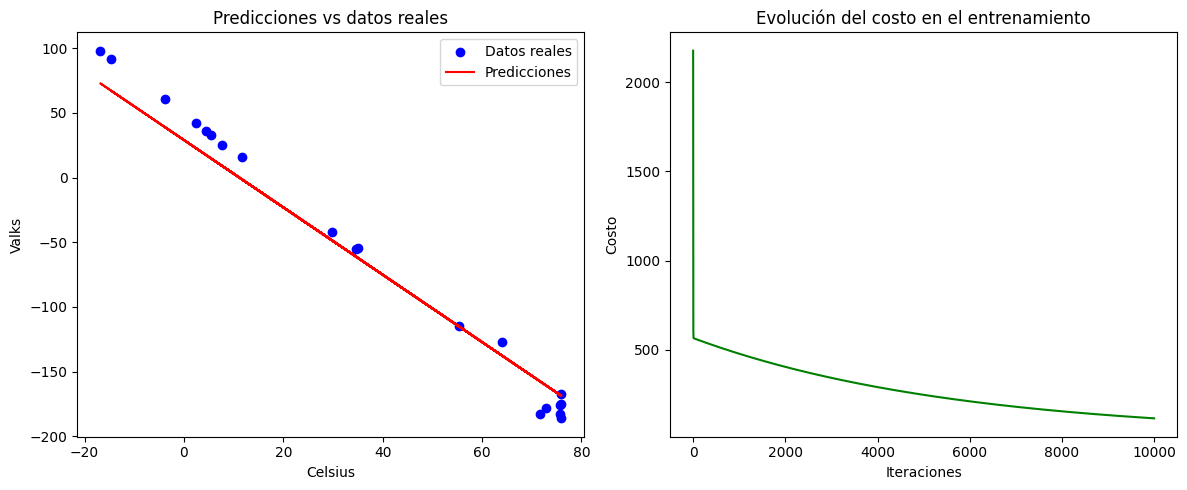

Pendiente (m): -2.602659841340007 

Intersección (b): 29.046798995179003 

Costo final (Error cuadratico medio (mse)): 114.88337101823215 

Costo (mse): 128.11021590429146 

Ecuación del modelo de regresión lineal: Valks = -2.602659841340007 x Celcius +  29.046798995179003


In [5]:
def compute_cost(X, y, m, b):
    n = len(y)
    cost = np.sum((m * X + b - y) ** 2) / (2 * n)
    return cost

learning_rate = 0.0001
m = 0.0
b = 0.0
iterations = 10000

cost_history = []

for i in range(iterations):
    y_pred = m * X_train + b
    dm = (-2/len(X_train)) * np.sum(X_train * (y_train - y_pred))
    db = (-2/len(X_train)) * np.sum(y_train - y_pred)
    m = m - learning_rate * dm
    b = b - learning_rate * db
    cost = compute_cost(X_train, y_train, m, b)
    cost_history.append(cost)

y_test_pred = m * X_test + b

test_cost = compute_cost(X_test, y_test, m, b)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_test_pred, color='red', label='Predicciones')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Predicciones vs datos reales')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(iterations), cost_history, color='green')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución del costo en el entrenamiento')
plt.tight_layout()
plt.show()


print("Pendiente (m):",m, "\n")
print("Intersección (b):", b , "\n")
print("Costo final (Error cuadratico medio (mse)):",cost_history[-1],"\n" )
print("Costo (mse):",test_cost,"\n" )
print("Ecuación del modelo de regresión lineal:", "Valks =", m , "x" , "Celcius + ", b)

En la primera grafica 'Predicciones vs datos reales' los puntos azules son los datos reales, y la linea roja es la representación de las predicciones del modelo de regresión lineal. Como vemos la linea roja se ajusta de manera adecuada, no perfecta, pero adecuada ya que la relación entre las variables puede no ser estrictamente lineal. En conclusión el modelo regresión implementado con descenso de gradiente logra capturar  la relación lineal entre las temperaturas en Celsius y Valks. Al tener una pendiente negativa esto nos dice que conforme la temperatura en celcius aumneta, la temperatura en valks va disminuyendo, lo cual se alinea con la relación que se observa en los datos.

En la segunda grafica 'Evolución del costo en el entrenamiento' se muestra como es que el costo , o sea el error cuadrático medio (mse) , va disminuyendo a lo largo de las iteraciones del descenso del gradiente. Como vemos al principio el costo disminuye de manera rapida , lo cual significa que el modelo aprende rapidamente a ajustarse a los datos. Al alcanzar su mínimo local el costo empieza a estabilizarse.